# ARIMA 모형

시계열 $Y_t$을 차분(difference)한 결과로 만들어진 시계열 $ \nabla Y_t = Y_t - Y_{t-1} $이 ARMA 모형을 따르면 원래의 시계열 $Y_t$를 **ARIMA(Autoregressive Integrated Moving Average) 모형**이라고 한다.

만약 $d$번 차분한 후에야 시계열 $ \nabla^d Y_t$가 ARMA(p,q) 모형을 따른다면 적분 차수(order of integration)가 $d$인 ARIMA 모형으로 **ARIMA(p, d, q)**로 표기한다. $q=0$인 경우에는 ARI(p,d), $p=0$인 경우에는 IMA(d,q)로 표기한다.

## 단위근 특성

ARIMA(p, 1, q) 모형은 특성 방정식(characteristic equation)이 $x=1$이라는 단위근(unit root)를 가진다. 이 특성으로 인해 확률 과정이 ARIMA(p, 1, q)에 해당하지는 확인하는 검정 방법을 통틀어 **단위근 검정(unit root test)**이라고도 한다.

단위근 특성은 다음과 같이 확인한다. ARIMA(p,1,q) 모형을 차분한 값을 $W_t=Y_t-Y_{t-1}$라고 하자. $W_t$는 ARMA(p,q) 모형이므로 다음과 같이 표현할 수 있다.

$$ W_t = \phi_1 W_{t-1} + \phi_2 W_{t-2} + \cdots + \phi_p W_{t-p} + e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

이를 다시 원 시계열 $Y_t$로 표현하면,

$$ Y_t-Y_{t-1} = \phi_1 (Y_t-Y_{t-1}) + \phi_2 (Y_{t-1}-Y_{t-2}) + \cdots + \phi_p (Y_{t-p}-Y_{t-p-1}) + e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$


$$ Y_t = (1+\phi_1)Y_t+(\phi_2-\phi_1)Y_{t-1}+\cdots+(\phi_p-\phi_{p-1})Y_{t-p}-\phi_pY_{t-p-1}+e_t-\theta_1e_{t-1}-\theta_2 e_{t-2}-\cdots-\theta_q e_{t-q} $$

위 모형에 대한 특성 방정식은

$$ 1-(1+\phi_1)x-(\phi_2-\phi_1)x^2-\cdots-(\phi_p-\phi_{p-1})x^p+\phi_px^{p+1}$$

이를 인수분해하면 

$$(1-x)(1-\phi_1x-\phi_2x^2-\cdots-\phi_px^p)$$

이다. 즉 특성 방정식이 단위근($x=1$)을 가진다.

## IMA(1,1) 모형

ARIMA 모형의 가장 단순한 형태인 IMA(1,1)은 다음과 같다.

$$ Y_t = Y_{t-1} + e_t - \theta e_{t-1} $$

이 식을 일반 선형 확률 과정으로 표현하면 다음과 같다.

$$ Y_t = e_t+(1-\theta)e_{t-1}+(1-\theta)e_{t-2}+(1-\theta)e_{t-3}+\cdots $$

즉 과거의 백색 잡음을 누적(cumulation)한 것이라고 볼 수 있다.

IMA(1,1) 모형의 자기상관계수는 시차(lag)에 상관없이 거의 $1$이다. 즉, 정상과정처럼 시차가 증가해도 자기상관계수가 감소하지 않는다.

$$\rho_k = \text{corr}[Y_t,Y_{t-k}] \approx 1$$

이렇게 자기상관계수가 빠르게 감소하지 않는 것이 ARIMA와 같은 적분 과정(integrated process)의 특징이다.

## IMA(2,1) 모형

다음과 적분 차수가 2인 IMA(2,1)을 살펴보자

$$ \nabla^2 Y_t = e_t - \theta e_{t-1} $$

이 모형을 시뮬레이션하여 ACF를 살펴보면 아래와 같다. statsmodels는 ARIMA 모형을 위한 별도의 클래스가 없기 때문에 `ArmaProcess`를 사용한 후 누적합을 구하는 방식으로 시뮬레이션 한다.

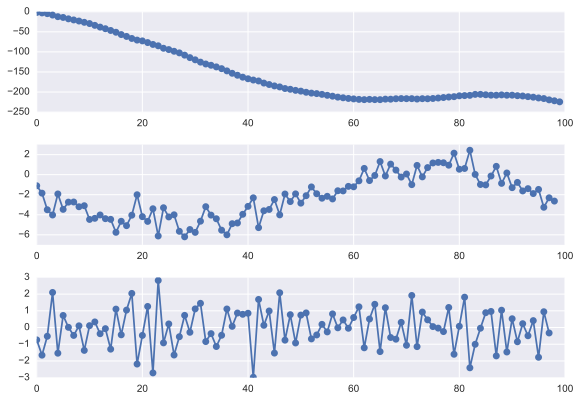

In [41]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], [-1, 0.6])
y2 = p.generate_sample(100).cumsum().cumsum()  #  ARIMA d=2
y1 = np.diff(y2)
y0 = np.diff(y1)
plt.subplot(311); plt.plot(y2, 'o-');
plt.subplot(312); plt.plot(y1, 'o-');
plt.subplot(313); plt.plot(y0, 'o-');
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

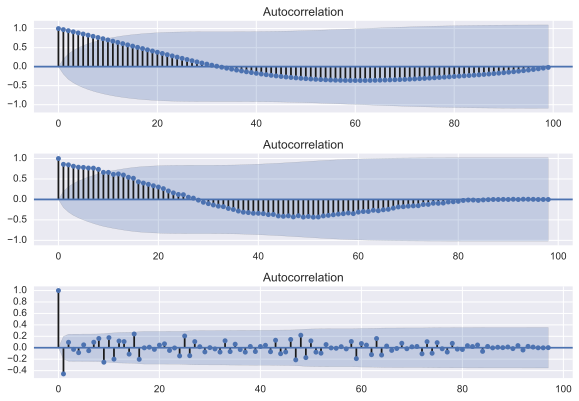

In [42]:
ax1 = plt.subplot(311); sm.tsa.graphics.plot_acf(y2, ax=ax1);
ax2 = plt.subplot(312); sm.tsa.graphics.plot_acf(y1, ax=ax2);
ax3 = plt.subplot(313); sm.tsa.graphics.plot_acf(y0, ax=ax3);
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

In [ ]:
y = p.generate_sample(100).cumsum

## 과차분

시계열 자료를 원래의 적분 차수 이상으로 차분하는 것을 **과차분(over-differencing)**이라고 한다. 

예를 들어 ARIMA(0,d,0) 모형의 시계열을 적분 차수에 맞게 차분하면 최종적으로 백색잡음이 된다. 만약 여기에서 추가적으로 차분을 하면 백색 잡음에 대한 MA(1) 모형이 되어 버린다. 한 번 더 차분한다면 이번에는 MA(2) 모형이 된다. 

$$ \nabla^d Y_t = e_t $$

$$ \nabla^{d+1} Y_t = e_t - e_{t-1} $$

$$ \nabla^{d+2} Y_t = e_t - 2e_{t-1} + e_{t-2} $$

즉 모형 차수가 불필요하게 증가하게 되므로 ACF를 보면 큰 시차에 대한 자기상관계수값이 남아있는 것을 볼 수 있다.

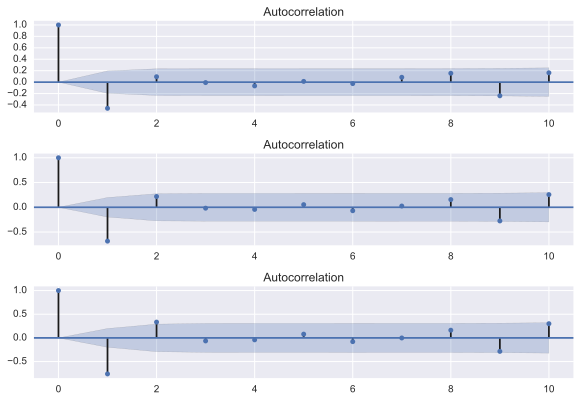

In [56]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], [-1, 0.6])
y2 = p.generate_sample(100)
y1 = np.diff(y2)
y0 = np.diff(y1)
ax1 = plt.subplot(311); sm.tsa.graphics.plot_acf(y2, lags=10,  ax=ax1);
ax2 = plt.subplot(312); sm.tsa.graphics.plot_acf(y1, lags=10,  ax=ax2);
ax3 = plt.subplot(313); sm.tsa.graphics.plot_acf(y0, lags=10,  ax=ax3);
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);